## 1. 初始準備
Keras可以用各種不同的深度學習套件當底層，在此用Tensorflow。

%env是jupyer的魔術指令可以用來設定環境變數。

In [ ]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

## 2. 讀入 MNIST數據庫
MNIST是有一堆0-9的手寫數字圖庫。
有6萬筆訓練資料,1萬筆測試資料。


### 2.1 由 Keras 讀入 MNIST

Keras幫我們準備好MNIST數據庫,可以將它讀進來(第一次要花點時間)。

In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


訓練資料6萬筆、測試資料1筆。

In [ ]:
len(x_train)

60000

In [ ]:
len(y_train)

60000

若在讀的過程中失敗,你需要找到下載的部份數據集刪去，再下載一次。

### 2.2 數據庫內容

每筆輸入(x)就是一個手寫的0-9中一個數字的圖檔,大小為28×28。

輸出(y)就是答案。

看看編號9487的訓練資料:

In [ ]:
x_train[9487].shape

(28, 28)

In [ ]:
x_train[9487]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 240,
        253, 165,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 241,
        252, 252,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2, 141, 252,
        252, 252,  98,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  30, 252, 252,
        252, 252, 149,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  21, 217, 252,
        252, 252, 149,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 134, 252,
        252, 252, 223,  31,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 134, 252,
        252, 252, 253,  44,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   8, 239,
        252, 252, 253,  44,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 238,
        252, 252, 253,  44,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 238,
        252, 252, 253,  44,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 178,
        253, 253, 255, 106,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  90,
        252, 252, 253, 206,  21,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  90,
        252, 252, 253, 252,  88,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  90,
        252, 252, 253, 252,  88,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  63,
        234, 252, 253, 252, 220,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        176, 252, 253, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         45, 252, 253, 252, 245,  71,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         29, 215, 253, 252, 237,   8,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 149, 253, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  61, 165, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

人眼辨識知道這是1。

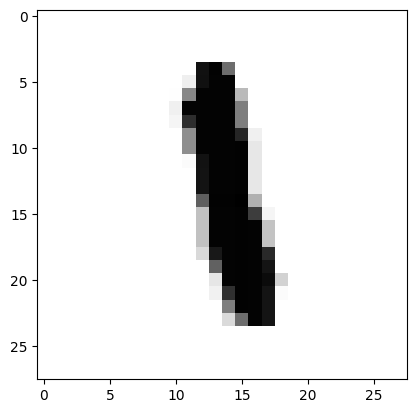

In [ ]:
plt.imshow(x_train[9487],cmap='Greys')

In [ ]:
y_train[9487]

1

### 2.3 輸入格式整理

用標準神經網路學手寫辨識。

原來的每筆數據是個28×28的矩陣(array),

但標準神經網路不接受這種格式,要變成28×28=784長的向量才行。

因此要用reshape調校。

In [ ]:
x_train.shape

(60000, 28, 28)

(60000, 28, 28) 代表 六萬筆資料，28×28的矩陣

In [ ]:
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)

### 2.4 輸出格式整理

輸入x是一張0的圖,訓練的神經網路總會有誤差,可能會得到: f(x)=0.5

這代表有可能是0,也有可能是1

於是我們會做“1-hot enconding"

• 1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]

• 5 -> [0, 0, 0, 0, 0, 1, 0, 0, 0]

分類問題基本上都要做這件事,Keras已有套件

In [ ]:
from keras.utils import to_categorical

# 將標籤進行 One-Hot Encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
y_train[9487]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

## 3. 打造第一個神經網路
我們決定了我們的函數是
f : R^784→R^10

只需要再決定要幾個隱藏層、每層要幾個神經元,用哪個激發函數就可以了。

### 3.1 決定神經網路架構、讀入相關套件

假如:
* 使用 2個 hidden layers
* 每個 hidden layer 500個神經元
* Activation Function 唯一用 sigmoid

從Keras把相關套件讀進來:

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

### 3.2 建構神經網路

標準一層一層傳遞的神經網路叫 Sequential

建立空的神經網路，模型名稱=Sequential()

In [ ]:
model = Sequential()

每次用add去加一層,從第一個隱藏層開始。

第一個隱藏層Keras不知道輸入有幾個features,所以要告訴它。

In [ ]:
model.add(Dense(500,input_dim=784))
model.add(Activation('sigmoid'))

第二層隱藏層因為前面輸出是500,現在輸入是500,就不用再寫input_dim

這裡的500只是告訴Keras,我們第二層還是用500

In [ ]:
model.add(Dense(500))
model.add(Activation('sigmoid'))

輸出有10個數字(0~9),所以輸出層的神經元是10個

網路輸出是: (y_1,y_2, ... ,y_10)

我們還希望

$ \sum ^{10}_{i=1} {{y}_{i}} $

結果是很容易,就用softmax當激發函數:

In [ ]:
model.add(Dense(10))
model.add(Activation('sigmoid'))

第一個神經網路就建好了

## 4. 組裝


In [ ]:
model.compile(loss='mse',optimizer=SGD(learning_rate=0.1),metrics=['accuracy'])

## 5. 檢視神經網路

### 5.1 看model的summary

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 500)               392500    
                                                                 
 activation_3 (Activation)   (None, 500)               0         
                                                                 
 dense_4 (Dense)             (None, 500)               250500    
                                                                 
 activation_4 (Activation)   (None, 500)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                5010      
                                                                 
 activation_5 (Activation)   (None, 10)                0         
                                                                 
Total params: 648010 (2.47 MB)
Trainable params: 64801

In [ ]:
# 392500 = 輸入784*與500神經元相連+ 500(幾個神經元就有幾個biases)
# 250500 = 第一層500神經元*第二層500神經元+500(幾個神經元就有幾個biases)
# 250500 = 500*500+500
# 5010 = 第二層500神經元*輸出10個神經元+10

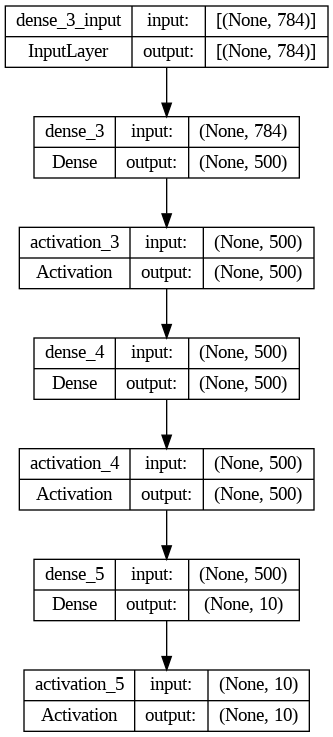

In [ ]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='model01.png')

## 6. 訓練神經網路
batch_size:一次要訓練幾筆資料

epochs:資料一共要訓練幾次

In [ ]:
model.fit(x_train, y_train, batch_size=100, epochs=20)

Epoch 1/20
600/600 [==============================] - 8s 13ms/step - loss: 0.0846 - accuracy: 0.3644
Epoch 2/20
600/600 [==============================] - 7s 12ms/step - loss: 0.0661 - accuracy: 0.6525
Epoch 3/20
600/600 [==============================] - 8s 14ms/step - loss: 0.0515 - accuracy: 0.7784
Epoch 4/20
600/600 [==============================] - 10s 17ms/step - loss: 0.0415 - accuracy: 0.8315
Epoch 5/20
600/600 [==============================] - 9s 15ms/step - loss: 0.0347 - accuracy: 0.8569
Epoch 6/20
600/600 [==============================] - 7s 12ms/step - loss: 0.0300 - accuracy: 0.8720
Epoch 7/20
600/600 [==============================] - 8s 14ms/step - loss: 0.0265 - accuracy: 0.8835
Epoch 8/20
600/600 [==============================] - 8s 13ms/step - loss: 0.0240 - accuracy: 0.8908
Epoch 9/20
600/600 [==============================] - 7s 12ms/step - loss: 0.0220 - accuracy: 0.8968
Epoch 10/20
600/600 [==============================] - 7s 12ms/step - loss: 0.0204 - accur

In [ ]:
from ipywidgets import interact_manual

試用結果

In [ ]:
# 使用模型進行預測
predictions = model.predict(x_test)

# 將預測的概率轉換為類別
predict_classes = np.argmax(predictions, axis=-1)


313/313 [==============================] - 2s 4ms/step


In [ ]:
# 定義測試函數
def test(測試編號):
    plt.imshow(x_test[測試編號].reshape(28,28), cmap="Greys")
    print("神經網路判斷為:", predict_classes[測試編號])

interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Button(description='Run Interact', …

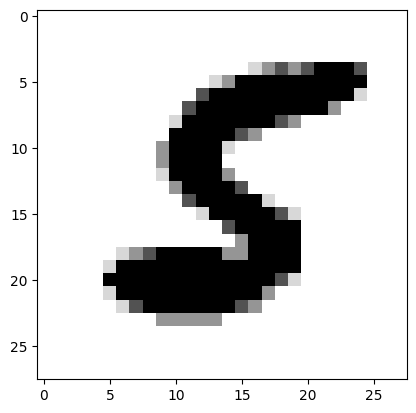

In [ ]:
# 創建交互式小工具
interact_manual(test, 測試編號=(0, 9999));

## 8. 訓練好的神經網路存起來!
下次就不用從零開始訓練

In [ ]:
model_json = model.to_json()
# open('./data/handwriting_model_architecture.json', 'w').write(model_json)
model.save_weights('handwriting_model_weights.h5')